# Natural Language Processing (NLP)
Training the sentiment analysis model.

Importing Required Library, pandas

In [7]:
import pandas as pd

Using dataset from https://www.kaggle.com/datasets/abhi8923shriv/sentiment-analysis-dataset


In [8]:
df_train = pd.read_csv("train.csv", encoding='latin-1')
df_train.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [9]:
print(df_train.columns)  # Print all the columns
print(df_train.dtypes)  # Check data type of columns

Index(['textID', 'text', 'selected_text', 'sentiment', 'Time of Tweet',
       'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)',
       'Density (P/Km²)'],
      dtype='object')
textID               object
text                 object
selected_text        object
sentiment            object
Time of Tweet        object
Age of User          object
Country              object
Population -2020      int64
Land Area (Km²)     float64
Density (P/Km²)       int64
dtype: object


# Checking for Missing Values and removing them

Checks the DataFrame for any missing values in each column and sums them up. It's important to identify missing values because they can affect the performance of the model.

In [10]:
df_train.isnull().sum()

,0
textID,0
text,1
selected_text,1
sentiment,0
Time of Tweet,0
Age of User,0
Country,0
Population -2020,0
Land Area (Km²),0
Density (P/Km²),0


Drop rows with any null values

In [11]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

,0
textID,0
text,0
selected_text,0
sentiment,0
Time of Tweet,0
Age of User,0
Country,0
Population -2020,0
Land Area (Km²),0
Density (P/Km²),0


# Preparing the Data for Training

X contains the review texts, and y contains the sentiment labels (positive, neutral, negative).

In [12]:
# Extract features (text) and labels (sentiment)
X_train = df_train['text']
y_train = df_train['sentiment']

In [13]:
X_train

,text
0,"I`d have responded, if I were going"
1,Sooo SAD I will miss you here in San Diego!!!
2,my boss is bullying me...
3,what interview! leave me alone
4,"Sons of ****, why couldn`t they put them on t..."
...,...
27476,wish we could come see u on Denver husband l...
27477,I`ve wondered about rake to. The client has ...
27478,Yay good for both of you. Enjoy the break - y...
27479,But it was worth it ****.


In [14]:
y_train

,sentiment
0,neutral
1,negative
2,negative
3,negative
4,negative
...,...
27476,negative
27477,negative
27478,positive
27479,positive


# Creating and Training the Model

This block of code creates a machine learning pipeline consisting of two steps: vectorization and classification.

 * TF-IDF Vectorizer: Converts the raw review texts into a numerical format (specifically, TF-IDF vectors) that the machine learning model can work with. TF-IDF stands for Term Frequency-Inverse Document Frequency, a way to quantify the importance of words in a document based on how frequently they appear in that document and how unique they are across all documents.
 * LinearSVC: A type of Support Vector Machine (SVM) used for classification. It tries to find the best boundary that separates data points of different classes.

The pipeline first transforms the texts into TF-IDF vectors and then fits (trains) a LinearSVC model on the training data.

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

# Creating and training the model
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC())
])

text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

# Preparing the Test Data

In [16]:
df_test = pd.read_csv("test.csv", encoding='latin-1')
df_test.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [17]:
# Remove any missing values
df_test.dropna(inplace=True)

In [18]:
X_test = df_test['text']
y_test = df_test['sentiment']

In [20]:
X_test

,text
0,Last session of the day http://twitpic.com/67ezh
1,Shanghai is also really exciting (precisely -...
2,"Recession hit Veronique Branquinho, she has to..."
3,happy bday!
4,http://twitpic.com/4w75p - I like it!!
...,...
3529,"its at 3 am, im very tired but i can`t sleep ..."
3530,All alone in this old house again. Thanks for...
3531,I know what you mean. My little dog is sinkin...
3532,_sutra what is your next youtube video gonna b...


In [21]:
y_test

,sentiment
0,neutral
1,positive
2,negative
3,positive
4,positive
...,...
3529,negative
3530,positive
3531,negative
3532,positive


# Evaluating the Model

After training, the model makes predictions on the test data. The classification_report function then generates a report that shows the main classification metrics, such as precision, recall, and f1-score, for each class. These metrics help in evaluating the performance of the model.

In [22]:
predictions = text_clf.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.67      0.67      0.67      1001
     neutral       0.64      0.66      0.65      1430
    positive       0.76      0.73      0.75      1103

    accuracy                           0.68      3534
   macro avg       0.69      0.69      0.69      3534
weighted avg       0.69      0.68      0.69      3534



# Visualizing the Confusion Matrix

This code generates and displays a confusion matrix, a visualization that helps understand how well the model is predicting each class. It shows the number of correct and incorrect predictions made by the model, categorized by the actual classes.

In [23]:
cm = confusion_matrix(y_test, predictions)
cm

array([[672, 291,  38],
       [275, 939, 216],
       [ 57, 238, 808]])

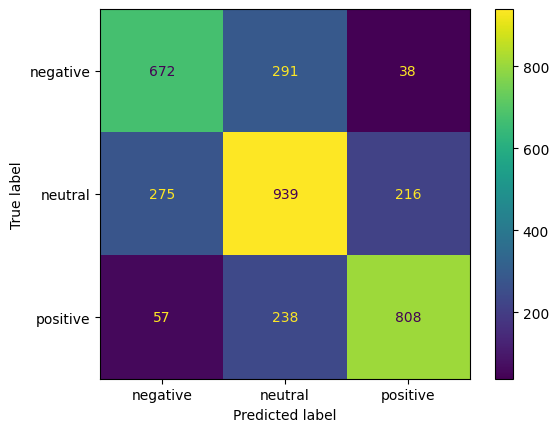

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=text_clf.classes_)
disp.plot()

# Making Predictions with the Model

Finally, this line of code demonstrates how to use the trained model to make predictions on new, unseen data.


In [25]:
text_clf.predict(['I found this great.'])

array(['positive'], dtype=object)